# Import packages and upload dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [2]:
df = pd.read_csv("data/compas-scores-raw.csv")
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
pr = pd.read_csv("data/propublica_data_for_fairml.csv")
pr.head()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


In [4]:
cx = pd.read_csv("data/cox-violent-parsed_filt.csv")
cx.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


# Inspecting the Data

In [5]:
df.dtypes

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
dtype: object

In [6]:
df.describe()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
count,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.0,60843.0
mean,53683.206154,68061.029190,60209.128149,21.819536,1.630048,11.000000,5.081457,3.571701,1.0,0.0
std,14363.648515,7320.208226,9638.501654,0.932614,0.944220,4.966596,10.080518,2.617854,0.0,0.0
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0
25%,52039.000000,62582.000000,56021.000000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0
50%,57321.000000,68229.000000,61261.000000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0
75%,62748.000000,73870.000000,66554.000000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0


Investigating the nan data:

In [7]:
df.isnull().sum() 

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

In [8]:
df.apply("nunique")

Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
DisplayText                    3
RawScore                     659
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
dtype: int64

In [9]:
df.shape

(60843, 28)

In [10]:
pr.dtypes

Two_yr_Recidivism       int64
Number_of_Priors        int64
score_factor            int64
Age_Above_FourtyFive    int64
Age_Below_TwentyFive    int64
African_American        int64
Asian                   int64
Hispanic                int64
Native_American         int64
Other                   int64
Female                  int64
Misdemeanor             int64
dtype: object

In [11]:
pr.describe()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,0.455120,3.246436,0.445723,0.209494,0.218244,0.514420,0.005023,0.082469,0.001782,0.055574,0.190376,0.356773
std,0.498022,4.743770,0.497086,0.406981,0.413087,0.499833,0.070698,0.275101,0.042182,0.229115,0.392629,0.479086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
pr.isnull().sum()

Two_yr_Recidivism       0
Number_of_Priors        0
score_factor            0
Age_Above_FourtyFive    0
Age_Below_TwentyFive    0
African_American        0
Asian                   0
Hispanic                0
Native_American         0
Other                   0
Female                  0
Misdemeanor             0
dtype: int64

In [13]:
pr.apply("nunique")

Two_yr_Recidivism        2
Number_of_Priors        36
score_factor             2
Age_Above_FourtyFive     2
Age_Below_TwentyFive     2
African_American         2
Asian                    2
Hispanic                 2
Native_American          2
Other                    2
Female                   2
Misdemeanor              2
dtype: int64

In [14]:
pr.shape

(6172, 12)

In [15]:
cx.dtypes

id                         float64
name                        object
first                       object
last                        object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in                   object
violent_recid              float64
is_violent_recid             int64
vr_charge_degree    

In [16]:
cx.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,event
count,11001.00000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,17019.000000,17449.000000,18316.000000,6359.000000,0.0,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000
mean,5501.00000,34.019273,0.076873,4.997052,0.098439,0.124263,3.913191,4.302485,57.694596,0.414774,19.961629,NaN,0.073105,4.997052,4.022822,3.913191,0.044715
std,3175.85949,11.667811,0.464272,2.937569,0.517639,0.524537,5.299864,81.159881,317.994694,0.576449,74.139695,NaN,0.260317,2.937569,2.614189,5.299864,0.206683
min,1.00000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,-1.000000,NaN,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2751.00000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,2.000000,0.000000,0.000000
50%,5501.00000,31.000000,0.000000,5.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,5.000000,4.000000,2.000000,0.000000
75%,8251.00000,41.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,8.000000,6.000000,5.000000,0.000000
max,11001.00000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,43.000000,1.000000


In [17]:
cx.isnull().sum()

id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date              9899
r_charge_desc              10039
r_jail_in                  11957
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            16977
vr_charge_

In [18]:
cx.apply("nunique")

id                         11001
name                       10855
first                       3876
last                        5635
sex                            2
dob                         7485
age                           65
age_cat                        3
race                           6
juv_fel_count                 12
decile_score                  11
juv_misd_count                11
juv_other_count               12
priors_count                  39
days_b_screening_arrest      534
c_jail_in                   9806
c_jail_out                  8714
c_days_from_compas           657
c_charge_degree               14
c_charge_desc                513
is_recid                       3
r_charge_degree               10
r_days_from_arrest           201
r_offense_date              1075
r_charge_desc                341
r_jail_in                    972
violent_recid                  0
is_violent_recid               2
vr_charge_degree               9
vr_offense_date              570
vr_charge_

# Cleaning the Data

In [19]:
df.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [20]:
# checking for duplicated values
df.duplicated().sum() 

0

As seen from the isnull analysis of the data, most people do not have a middle name and this is not relevant to exploring the data in our dataset, so we may remove that column. We also see that isCompleted, isDeleted, AssessmentReason only has one value, so this will also be irrelevant to our analysis.

In [21]:
df["AssessmentReason"]

0        Intake
1        Intake
2        Intake
3        Intake
4        Intake
          ...  
60838    Intake
60839    Intake
60840    Intake
60841    Intake
60842    Intake
Name: AssessmentReason, Length: 60843, dtype: object

In [22]:
df = df.drop(['MiddleName', 'IsCompleted', 'IsDeleted', 'AssessmentReason'], axis=1)
df

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,09/16/84,22,...,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,09/16/84,22,...,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,Male,African-American,06/21/64,22,...,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New
60839,65667,79665,72038,Probation,West,James,Male,African-American,06/21/64,22,...,Single,12/31/14 0:00,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,02/06/85,22,...,Single,12/31/14 0:00,1,Low,7,Risk of Violence,-2.75,2,Low,New
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,02/06/85,22,...,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New


There are a few columns that should be represented in datetime objects, but are solely represented as objects. Thus, we should convert these columns: DateofBirth, Screening_Date

In [23]:
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"], format="%m/%d/%y")

In [24]:
df["DateOfBirth"] = pd.to_datetime(df["Screening_Date"], format="%m/%d/%y %H:%M")

In [25]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,2013-01-01,22,...,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,2013-01-01,22,...,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,2013-01-01,22,...,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,2013-01-01,22,...,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,2013-01-01,22,...,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New


There are many variables within the dataframe that are one word. We must one-hot encode these examples for them to be of statistical use (e.g. sex)

# Exploratory Data Analysis

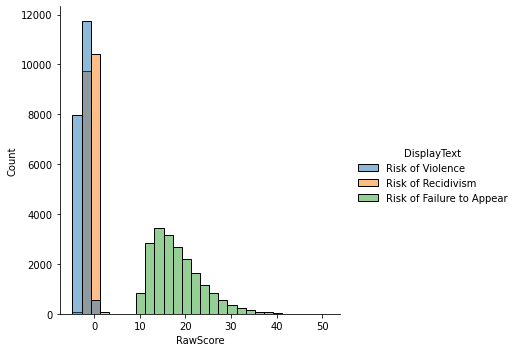

In [37]:
sns.displot(df, x="RawScore", binwidth=2, hue="DisplayText")

In [40]:
df["Agency_Text"].apply("nunique").values

AttributeError: 'int' object has no attribute 'values'